# LQ earnings vs LQ house price vs waiting List

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [33]:
waiting = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=0, skiprows = 1)
price = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=1, skiprows = 1)
earnings = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=2, skiprows = 1)
ratio = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=3, skiprows = 1)

waiting = waiting.drop(waiting.iloc[:,2:17], axis=1)

merged = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=4)
merged = merged.drop(merged.iloc[:, 0:1], axis=1)


## Graphs

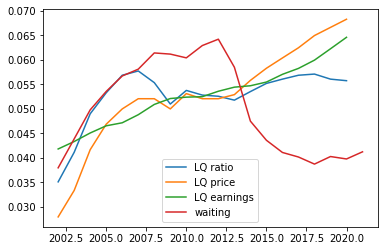

In [3]:
# plot normalised LQ price vs LQ earnings vs LQ ratio vs waiting List
priceCol = list(price.iloc[0])[2:]
price_norm = [float(i)/sum(priceCol) for i in priceCol]
waitingCol = list(waiting.iloc[0])[2:]
waiting_norm = [float(i)/sum(waitingCol) for i in waitingCol]
ratioCol = list(ratio.iloc[0])[2:]
ratio_norm = [float(i)/sum(ratioCol) for i in ratioCol]
earningsCol = list(earnings.iloc[0])[2:]
earnings_norm = [float(i)/sum(earningsCol) for i in earningsCol]

plt.plot(list(ratio.columns)[2:], ratio_norm, label = "LQ ratio")
plt.plot(list(price.columns)[2:], price_norm, label = "LQ price")
plt.plot(list(earnings.columns)[2:], earnings_norm, label = "LQ earnings")
plt.plot(list(waiting.columns)[2:], waiting_norm, label = "waiting")
plt.legend()

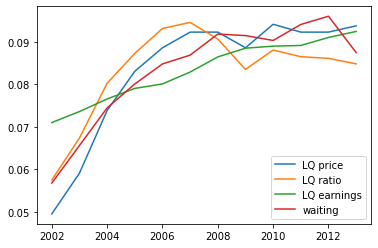

In [4]:
# plot normalised LQ price vs LQ earnings vs LQ ratio vs waiting List for correlated timescale only
endIndex = 14 # until 2013 inc.
priceCol = list(price.iloc[0])[2:endIndex]
price_norm = [float(i)/sum(priceCol) for i in priceCol]
waitingCol = list(waiting.iloc[0])[2:endIndex]
waiting_norm = [float(i)/sum(waitingCol) for i in waitingCol]
ratioCol = list(ratio.iloc[0])[2:endIndex]
ratio_norm = [float(i)/sum(ratioCol) for i in ratioCol]
earningsCol = list(earnings.iloc[0])[2:endIndex]
earnings_norm = [float(i)/sum(earningsCol) for i in earningsCol]

plt.plot(list(price.columns)[2:endIndex], price_norm, label = "LQ price")
plt.plot(list(ratio.columns)[2:endIndex], ratio_norm, label = "LQ ratio")
plt.plot(list(earnings.columns)[2:endIndex], earnings_norm, label = "LQ earnings")
plt.plot(list(waiting.columns)[2:endIndex], waiting_norm, label = "waiting")

plt.legend()

## Pearson's r value

In [34]:
# pearson's r computed using Pandas and Scipy between LQ price and waiting
overall_pearson_r = merged.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged.dropna()['waiting'], merged.dropna()['price'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


Pandas computed Pearson r: -0.17580727993750206
Scipy computed Pearson r: -0.17580727993750167 and p-value: 0.4715629326578455


In [35]:
# pearson's r computed using Pandas and Scipy between LQ earnings and waiting
overall_pearson_r = merged.corr().iloc[0,4]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged.dropna()['waiting'], merged.dropna()['earning'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


Pandas computed Pearson r: -0.29570092746995713
Scipy computed Pearson r: -0.29570092746995696 and p-value: 0.2190176134774588


In [36]:
# pearson's r computed using Pandas and Scipy between LQ ratio and waiting
overall_pearson_r = merged.corr().iloc[0,3]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged.dropna()['waiting'], merged.dropna()['ratio'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


Pandas computed Pearson r: 0.16814095583572222
Scipy computed Pearson r: 0.16814095583572242 and p-value: 0.4914043755753345


In [37]:
# pearson's r computed using Pandas and Scipy for correlated timescale only between LQ price and waiting (up to 2013 inc.)
merged2 = merged.drop(merged.index[range(12,19)])
overall_pearson_r = merged2.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged2.dropna()['waiting'], merged2.dropna()['price'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Pandas computed Pearson r: 0.9635238967572635
Scipy computed Pearson r: 0.9635238967572637 and p-value: 4.783056776311768e-07


In [38]:
#  pearson's r computed using Pandas and Scipy for correlated timescale only between LQ earnings and waiting (up to 2013 inc.)
merged2 = merged.drop(merged.index[range(12,19)])
overall_pearson_r = merged2.corr().iloc[0,4]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged2.dropna()['waiting'], merged2.dropna()['earning'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Pandas computed Pearson r: 0.9165265813448494
Scipy computed Pearson r: 0.9165265813448494 and p-value: 2.7707215017080855e-05


In [39]:
# pearson's r computed using Pandas and Scipy for correlated timescale only between LQ ratio and waiting
merged2 = merged.drop(merged.index[range(12,19)])
overall_pearson_r = merged2.corr().iloc[0,3]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged2.dropna()['waiting'], merged2.dropna()['ratio'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Pandas computed Pearson r: 0.8490424828204247
Scipy computed Pearson r: 0.8490424828204246 and p-value: 0.00047644005691794764


In [40]:
# pearson's r computed using Pandas and Scipy for -ve correlated timescale only between LQ price and waiting (2014 inc. onwards)
merged2 = merged.drop(merged.index[range(0,12)])
overall_pearson_r = merged2.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged2.dropna()['waiting'], merged2.dropna()['price'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Pandas computed Pearson r: -0.8525510148921739
Scipy computed Pearson r: -0.852551014892174 and p-value: 0.014786368366468202


In [42]:
# pearson's r computed using Pandas and Scipy for -ve correlated timescale only between LQ earnings and waiting (2014 inc. onwards)
merged2 = merged.drop(merged.index[range(0,12)])
overall_pearson_r = merged2.corr().iloc[0,4]

print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged2.dropna()['waiting'], merged2.dropna()['earning'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Pandas computed Pearson r: -0.7297559465622604
Scipy computed Pearson r: -0.7297559465622601 and p-value: 0.06264546761091616


In [43]:
# pearson's r computed using Pandas and Scipy for -ve correlated timescale only between LQ ratio and waiting (2014 inc. onwards)
merged2 = merged.drop(merged.index[range(0,12)])
overall_pearson_r = merged2.corr().iloc[0,3]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged2.dropna()['waiting'], merged2.dropna()['ratio'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Pandas computed Pearson r: -0.9424709052269229
Scipy computed Pearson r: -0.9424709052269236 and p-value: 0.0014779340424424944
